# Data and Sampling Distributions

## Sampling Distribution of a Statistic

In [9]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [10]:
loans_income = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\loans_income.csv").squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

The _Python_ code uses seaborn’s FacetGrid to show the three histograms:

In [12]:
# First graph
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type': 'Data',})

# 2nd graph
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Mean of 5',
})

# 3rd graph
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
48207   43000.0  Data
49618   51480.0  Data
7734    47800.0  Data
12120   43000.0  Data
45387  125000.0  Data


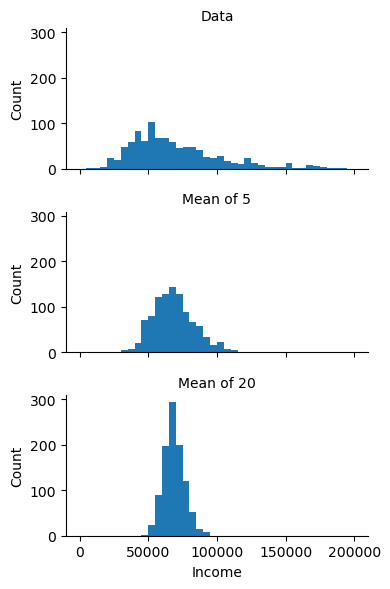

In [13]:
g=sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## The Bootstrap

One easy and effective way to estimate the sampling distribution of a statistic, or of model parameters, is to draw additional samples, with replacement, from the sample itself and recalculate the statistic or model for each resample.

The algorithm for a bootstrap resampling of the mean, for a sample of size n, is as follows:
1. Draw a sample value, record it, and then replace it. 
2. Repeat n times. 
3. Record the mean of the n resampled values. 
4. Repeat steps 1–3 R times. 
5. Use the R results to:
   a. Calculate their standard deviation (this estimates sample mean standard error).
   b. Produce a histogram or boxplot.
   c. Find a confidence interval.

The major Python packages don’t provide implementations of the bootstrap approach. It can be implemented using the `scikit-learn` method `resample`:

In [16]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean()-loans_income.median()}')
print(f'std.error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -74.30000000000291
std.error: 209.7314253295667


## Resampling vs Bootstrapping

## Confidence Intervals

68760.51844
55734.1


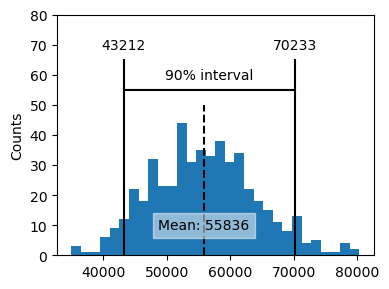

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

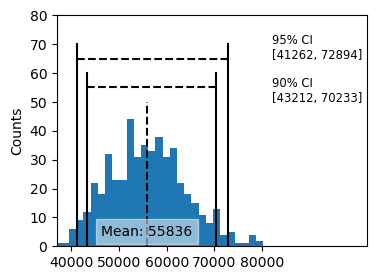

In [20]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

## Normal Distribution

## Standard Normal and QQ-Plots

A QQ-Plot is used to visually determine how close a sample is to a specified distribution—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be considered close to normal.

In _Python_, use the method `scipy.stats.probplot` to create the QQ-Plot:

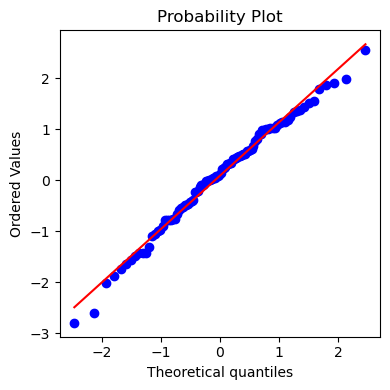

In [24]:
fig, ax = plt.subplots(figsize=(4,4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

## Long-Tailed Distributions

### Key Terms
_Tail_ - The long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency.

_Skew_ - Where one tail of a distribution is longer than other.

### Key Ideas
• Most data is not normally distributed. 
• Assuming a normal distribution can lead to underestimation of _extreme events_ (“black swans”).

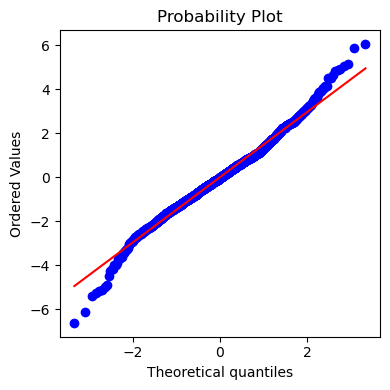

In [26]:
sp500_px = pd.read_csv(r"E:\Personal\Full_Stack_Data_Analyst\Data Science\O'Reilly Books\practical-statistics-for-data-scientists-master\practical-statistics-for-data-scientists-master\data\sp500_data.csv.gz")

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(4,4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()

## Binomial Distribution

The binomial distribution is the frequency distribution of the number of successes _(x)_ in a given number of trials _(n)_ with specified probability _(p)_ of success in each trial. There is a family of binomial distributions, depending on the values of n and p. The binomial distribution would answer a question like:

_If the probability of a click converting to a sale is 0.02, what is the probability of observing 0 sales in 200 clicks?_

### Key Terms
_`Trial`_ - An event with a discrete outcome (e.g., a coin flip).

_`Success`_ - The outcome of interest for a trial.
            _Synonym_ 
                “1” (as opposed to “0”)
            
_`Binomial`_ - Having two outcomes.
            _Synonyms_ 
                yes/no, 0/1, binary

_`Binomial Trial`_ - A trial with two outcomes.
            _Synonym_ 
                Bernoulli trial

_`Binomial distribution`_ - Distribution of number of successes in _x_ trials
            _Synonym_ 
                Bernoulli distribution

### Key Ideas
- Binomial outcomes are important to model, since they represent, among other things, fundamental decisions (buy or don’t buy, click or don’t click, survive or die, etc.).
- A binomial trial is an experiment with two possible outcomes: one with probability _p_ and the other with probability _1 – p_.
- With large _n_, and provided _p_ is not too close to 0 or 1, the binomial distribution can be approximated by the normal distribution. 

The `scipy.stats` module implements a large variety of statistical distributions. For the binomial distribution, use the functions `stats.binom.pmf` and `stats.binom.cdf`:

In [41]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [43]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

## Chi-Square Distribution

An important idea in statistics is _departure from expectation_, especially with respect to category counts. Expectation is defined loosely as “nothing unusual or of note in the data” (e.g., no correlation between variables or predictable patterns). This is also termed the “null hypothesis” or “null model” (see “The Null Hypothesis” on page 94). For example, you might want to test whether one variable (say, a row variable representing gender) is independent of another (say, a column variable representing “was promoted in job”), and you have counts of the number in each of the cells of the data table. The statistic that measures the extent to which results depart from the null expectation of independence is the chi-square statistic. It is the difference between the observed and expected values, divided by the square root of the expected value, squared, then summed across all categories. This process standardizes the statistic so 
it can be compared to a reference distribution. A more general way of putting this is to note that the chi-square statistic is a measure of the extent to which a set of observed values “fits” a specified distribution (a “goodness-of-fit” test). It is useful for determining whether multiple treatments (an “A/B/C… test”) differ from one another in their effects.

The chi-square distribution is the distribution of this statistic under repeated resampled draws from the null model—see “Chi-Square Test” on page 124 for a detailed algorithm, and the chi-square formula for a data table. A `low chi-square value` for a set of counts indicates that they _closely follow the expected distribution_. A `high chi-square` indicates that they _differ markedly from what is expected_. There are a variety of chi-square distributions associated with different degrees of freedom (e.g., number of observations—see “Degrees of Freedom” on page 116).

### Key Ideas
- The chi-square distribution is `typically concerned with counts of subjects` or items falling into categories.
- The chi-square statistic measures the `extent of departure` from what you would expect in a null model. 

## F-Distribution

A common procedure in scientific experimentation is to test multiple treatments across groups—say, different fertilizers on different blocks of a field. This is similar to the A/B/C test referred to in the chi-square distribution (see “Chi-Square Distribution” on page 80), except we are `dealing with measured continuous values rather than counts`. In this case we are _interested in the extent to which differences among group means are greater than we might expect under normal random variation_. The F-statistic measures this and is the ratio of the variability among the group means to the variability within each group (also called residual variability). This comparison is termed an analysis of variance (see “ANOVA” on page 118). The distribution of the F-statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (i.e., a null model). There are a variety of F-distributions associated with different degrees of freedom (e.g., numbers of groups—see “Degrees of Freedom” on page 116). The calculation of F is illustrated in the section on ANOVA. The F-statistic is also used in linear regression to compare the variation accounted for by the regression model to the overall variation in the data. F-statistics are produced automatically by R and Python as part of regression and ANOVA routines.

### Key Ideas
- The F-distribution is used with experiments and linear models involving measured data.
- The F-statistic compares variation due to factors of interest to overall variation.

# Poisson and Related Distributions

## Key Terms
_Lambda_ - The rate (per unit of time or space) at which events occur.

_Poisson distribution_ - The frequency distribution of the number of events in sampled units of time or space.

_Exponential Distritbution_ - The frequency distribution of the time or distance from one event to the next event.

_Weibull distribution_ - A generalized version of the exponential distribution in which the event rate is allowed to shift over time.

## Poisson Disrtibutions

The Poisson distribution tells us the distribution of events per unit of time or space when we sample many such units. It is useful when addressing queuing questions such as _“How much capacity do we need to be 95% sure of fully processing the internet traffic that arrives on a server in any five-second period?”_

The key parameter in a Poisson distribution is λ, or lambda. This is the mean number of events that occurs in a specified interval of time or space. The variance for a Poisson distribution is also λ.

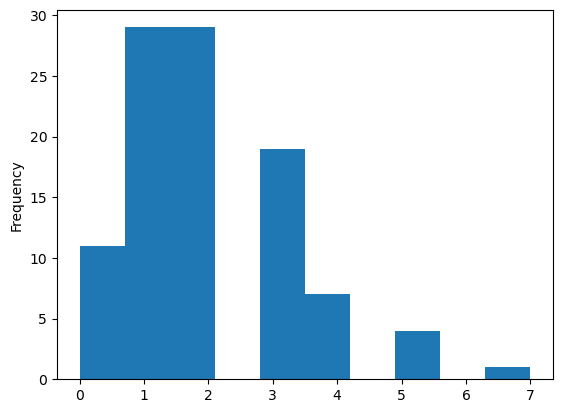

In [59]:
sample = stats.poisson.rvs(2, size = 100)

pd.Series(sample).plot.hist()
plt.show()

## Exponential Distributions

Using the same parameter λ that we used in the Poisson distribution, we can also `model the distribution of the time between events`: time between visits to a website or between cars arriving at a toll plaza. It is also used in engineering to model time to failure, and in process management to model, for example, the time required per service call.

A _key assumption_ in any simulation study for either the Poisson or exponential distribution is that `the rate, λ, remains constant over the period being considered`.

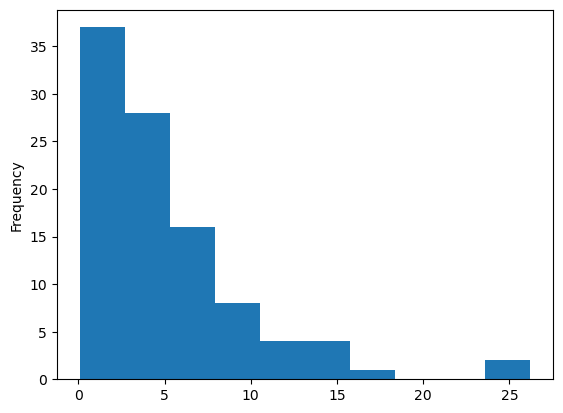

In [68]:
# (rate, n/size)
sample = stats.expon.rvs(scale =5, size =100)

pd.Series(sample).plot.hist()
plt.show()

## Weibull Distribution

The Weibull distribution is an extension of the exponential distribution in which the event rate is allowed to change, as specified by a _shape parameter_, β. If β > 1, the probability of an event increases over time; if β < 1, the probability decreases. Because the Weibull distribution is used with time-to-failure analysis instead of event rate, the second parameter is expressed in terms of characteristic life, rather than in terms of the rate of events per interval. The symbol used is η, the Greek letter eta. It is also called the _scale_ parameter.

### Key Ideas
- For events that occur at a constant rate, the number of events per unit of time or space can be modeled as a Poisson distribution.
- You can also model the time or distance between one event and the next as an exponential distribution.
- A changing event rate over time (e.g., an increasing probability of device failure) can be modeled with the Weibull distribution.

To achieve the same in Python, use the function `stats.weibull_min.rvs`: 

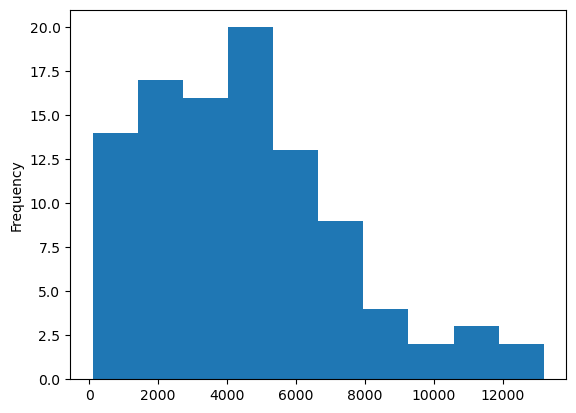

In [76]:
sample=stats.weibull_min.rvs(1.5, scale=5000, size =100)

pd.Series(sample).plot.hist()
plt.show()